In [15]:
import pandas as pd
import zipfile
import matplotlib.pyplot as plt
import numpy as np


In [16]:
def aggregate_zip(zip_path, value_cols):
    final_df = []

    with zipfile.ZipFile(zip_path, 'r') as z:
        for file in z.namelist():
            if file.endswith('.csv'):
                with z.open(file) as f:
                    df = pd.read_csv(f)

                    if 'state' not in df.columns:
                        continue

                    df[value_cols] = df[value_cols].fillna(0)
                    df = df.groupby('state')[value_cols].sum().reset_index()
                    final_df.append(df)

    result = pd.concat(final_df)
    return result.groupby('state').sum()


In [17]:
bio_df = aggregate_zip(
    '/content/api_data_aadhar_biometric.zip',
    ['bio_age_5_17','bio_age_17_']
)

demo_df = aggregate_zip(
    '/content/api_data_aadhar_demographic.zip',
    ['demo_age_5_17','demo_age_17_']
)

en_df = aggregate_zip(
    '/content/api_data_aadhar_enrolment.zip',
    ['age_0_5','age_5_17','age_18_greater']
)

en_df['total_enrolment'] = en_df.sum(axis=1)


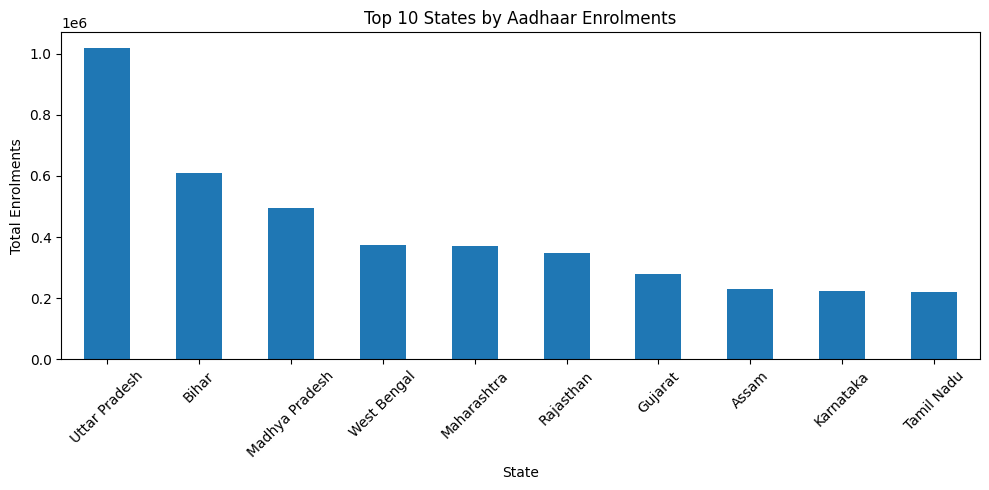

In [18]:
top10 = en_df.sort_values('total_enrolment', ascending=False).head(10)

plt.figure(figsize=(10,5))
top10['total_enrolment'].plot(kind='bar')
plt.title("Top 10 States by Aadhaar Enrolments")
plt.xlabel("State")
plt.ylabel("Total Enrolments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


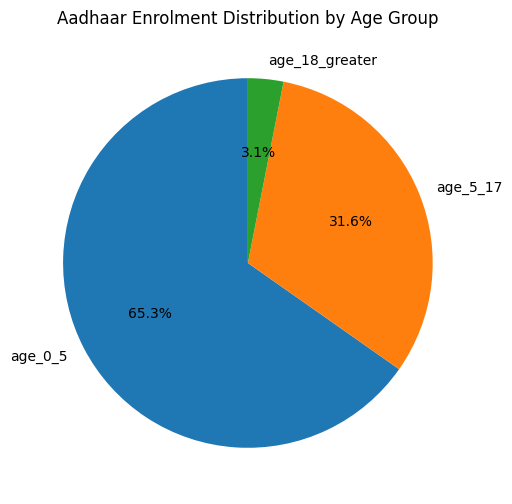

In [19]:
age_totals = en_df[['age_0_5','age_5_17','age_18_greater']].sum()

plt.figure(figsize=(6,6))
age_totals.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Aadhaar Enrolment Distribution by Age Group")
plt.ylabel("")
plt.show()


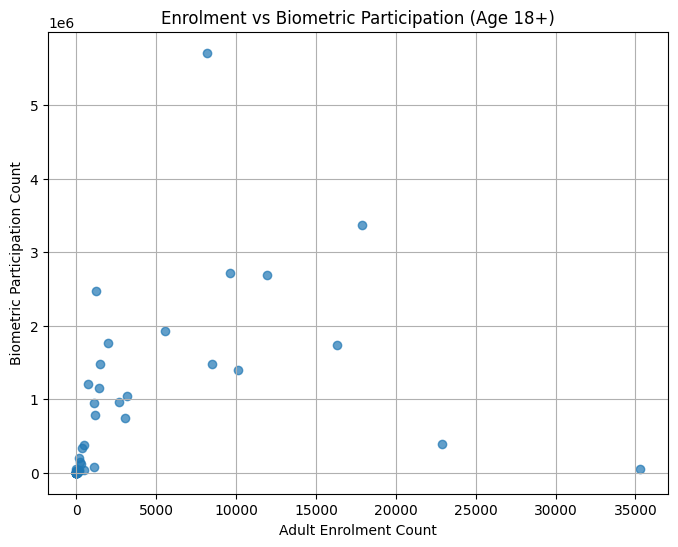

In [20]:
merged = en_df.join(bio_df, how='inner')

plt.figure(figsize=(8,6))
plt.scatter(
    merged['age_18_greater'],
    merged['bio_age_17_'],
    alpha=0.7
)

plt.title("Enrolment vs Biometric Participation (Age 18+)")
plt.xlabel("Adult Enrolment Count")
plt.ylabel("Biometric Participation Count")
plt.grid(True)
plt.show()


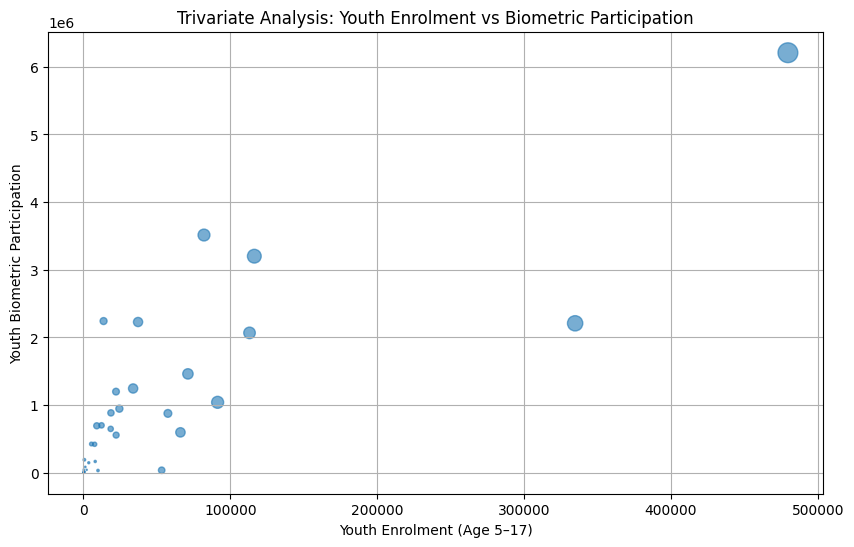

In [21]:
merged = en_df.join(demo_df, how='inner').join(bio_df, how='inner')

plt.figure(figsize=(10,6))
plt.scatter(
    merged['age_5_17'],                    # X
    merged['bio_age_5_17'],                # Y
    s=merged['total_enrolment']/5000,      # Bubble size
    alpha=0.6
)

plt.title("Trivariate Analysis: Youth Enrolment vs Biometric Participation")
plt.xlabel("Youth Enrolment (Age 5–17)")
plt.ylabel("Youth Biometric Participation")
plt.grid(True)
plt.show()


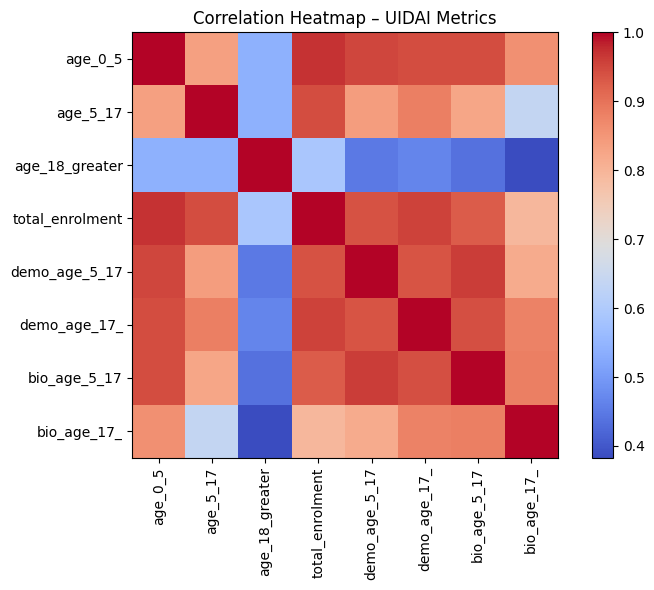

In [22]:
corr = merged.corr()

plt.figure(figsize=(8,6))
plt.imshow(corr, cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr)), corr.columns, rotation=90)
plt.yticks(range(len(corr)), corr.columns)
plt.title("Correlation Heatmap – UIDAI Metrics")
plt.tight_layout()
plt.show()
